## Arbol de clasificación

[1](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [1]:
# Importar modulos para el tratamiento de los datos y visualizaciones
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Cargar datos
df = pd.read_csv("Data/robot_wall_follower/sensor_readings_4.csv", header=None,
                 names=["sd_front", "sd_left", "sd_right", "sd_back", "target"])


In [3]:
df.head()

,sd_front,sd_left,sd_right,sd_back,target
0,1.687,0.445,2.332,0.429,Slight-Right-Turn
1,1.687,0.449,2.332,0.429,Slight-Right-Turn
2,1.687,0.449,2.334,0.429,Slight-Right-Turn
3,1.687,0.449,2.334,0.429,Slight-Right-Turn
4,1.687,0.449,2.334,0.429,Slight-Right-Turn


In [4]:
# Cargar datos con variables dummy
#df=pd.read_csv('Data/robot_wall_follower/wall_robot_01.csv')
#df.head()


In [5]:
#Creat a column to represent for Category of Data 
#df['target'] = pd.Categorical.from_codes(
#    df.target, 'df.target_names')

# Modelo 

In [6]:
from sklearn import model_selection
from sklearn import metrics
 #Importar modulo para la creación de los árboles
from sklearn import tree
#
from sklearn.model_selection import train_test_split


In [7]:
X = df.loc[:, df.columns != 'target']  # array numpy
y = df.target  # serie


In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=1)


In [9]:
[X_train.shape, 
X_test.shape, 
y_train.shape, 
y_test.shape]


[(4364, 4), (1092, 4), (4364,), (1092,)]

In [10]:
tm = tree.DecisionTreeClassifier(random_state=100).fit(X_train, y_train)


## Graficar el arbol


In [11]:
datos_graf = tree.export_graphviz(
    tm, out_file=None, feature_names=X_train.columns, filled=True, class_names=True)


In [12]:
# Del shell interactivo Ipython importar las funciones para crear la imagen
from IPython.display import Image
# Importar modulo que genera la estructura del árbol y graficarlo de acuerdo a los datos
import pydotplus


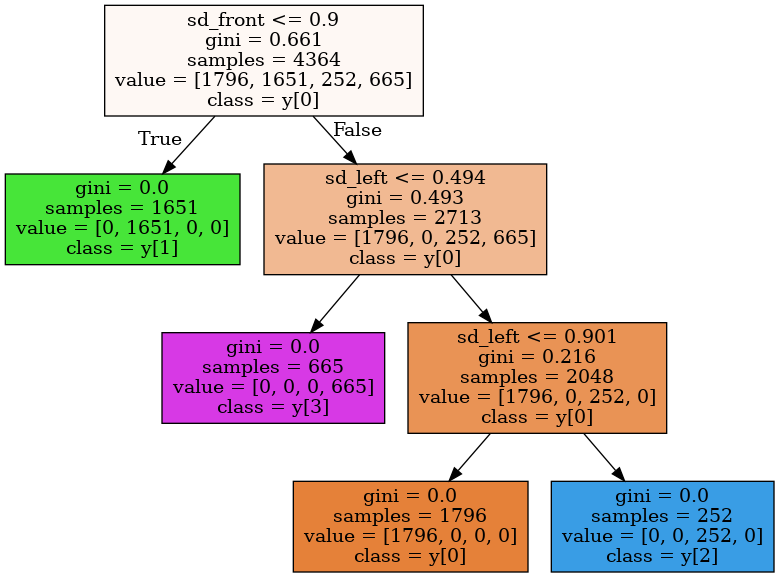

In [13]:
# Crear la imagen en formato png
graph = pydotplus.graph_from_dot_data(datos_graf)
Image(graph.create_png())
#graph.write_png('arboloriginalclass.png') # Si se desea guardar el árbol


## Evaluación del modelo

Solo usamos el conjunto test

In [14]:
y_test[5249]

'Move-Forward'

In [15]:
print('Predicted value is =', tm.predict([X_test.loc[447, :]]))

print('Actual value from test data is %s' %
       (y_test[447]))


Predicted value is = ['Slight-Right-Turn']
Actual value from test data is Slight-Right-Turn


## Puntuación del modelo

In [16]:
tm.score(X_test, y_test)


1.0

## Matriz de confusión

* La matriz de confusión ayuda a visualizar el rendimiento del modelo.
* Los elementos diagonales representan el número de puntos para los cuales la etiqueta predicha es igual a la etiqueta verdadera
* Los elementos fuera de la diagonal son aquellos que están mal etiquetados por el clasificador.
* Cuanto más altos sean los valores diagonales de la matriz de confusión, mejor, indicando muchos correctos
 
Creemos una matriz de confusión usando la biblioteca de sklearn y los datos de prueba

array([[409,   0,   0,   0],
       [  0, 446,   0,   0],
       [  0,   0,  76,   0],
       [  0,   0,   0, 161]])

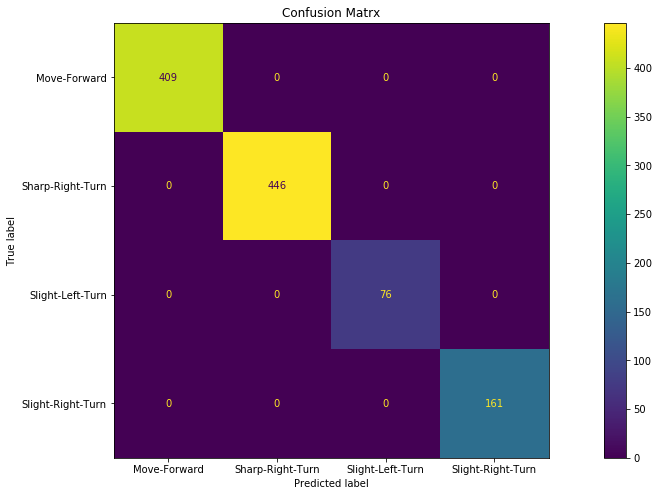

In [17]:
#Creating matplotlib axes object to assign figuresize and figure title
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_title('Confusion Matrx')

disp = metrics.plot_confusion_matrix(tm, X_test, y_test,ax=ax)#, display_labels=y_test, ax=ax)
disp.confusion_matrix


## Informe de clasificación

El informe de clasificación se utiliza para medir la calidad de la predicción del algoritmo de clasificación.
 
* Precisión: indica cuántas clases están correctamente clasificadas
* Recall: indica qué proporciones de positivos reales se identificaron correctamente
* F-Score: es la media armónica entre precisión y recall
* Soporte: es el número de ocurrencias de la clase dada en nuestro conjunto de datos

> Dado que las clases son desbalanceadas la metrica que deberíamos revisar es f1, sensibilidad o precisión.

In [18]:
print(metrics.classification_report(y_test, tm.predict(X_test)))


                   precision    recall  f1-score   support

     Move-Forward       1.00      1.00      1.00       409
 Sharp-Right-Turn       1.00      1.00      1.00       446
 Slight-Left-Turn       1.00      1.00      1.00        76
Slight-Right-Turn       1.00      1.00      1.00       161

         accuracy                           1.00      1092
        macro avg       1.00      1.00      1.00      1092
     weighted avg       1.00      1.00      1.00      1092



> ¿Hay problema de sobre-entrenemiento? es necesario hacer evaluación del modelo con datos de train

### ROC AUC score

Considerar que para hallar ROC AUC score en multiclase, es necesario tener en cuenta que los valores predecidos se deben incluir en valores de probabilidad.

In [19]:
y_pred_proba = tm.predict_proba(X_test)

In [20]:
metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr',
                      labels=['Move-Forward', 'Sharp-Right-Turn', 'Slight-Left-Turn', 'Slight-Right-Turn'])



1.0

El area bajo la curva me indica que el modelo clasifica el 100 % de las instancias de forma correcta.
